In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

%matplotlib inline

/home/irmorales/Projects/IntroductionToMLWithPython/Source/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


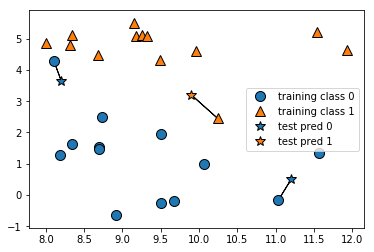

In [2]:
# In its simplest version the algorithm only takes care of the nearest neighbor 
mglearn.plots.plot_knn_classification(n_neighbors=1)

/home/irmorales/Projects/IntroductionToMLWithPython/Source/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


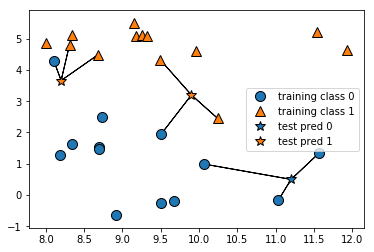

In [5]:
# Check how the prediction may change if we increment the number of neighbors
mglearn.plots.plot_knn_classification(n_neighbors=3)


In [6]:
from sklearn.model_selection import train_test_split

X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/home/irmorales/Projects/IntroductionToMLWithPython/Source/venv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [7]:
# Create the knn instance
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [8]:
# Train our algorithm
clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [9]:
# Now we test the algorithm using the test data
print("Test set prediction: {}".format(clf.predict(X_test)))

Test set prediction: [1 0 1 0 1 0 0]


In [12]:
# Validate the accuracy
print("Accuracy: {:.2f}%".format(clf.score(X_test, y_test)*100))

Accuracy: 85.71%


AttributeError: 'AxesSubplot' object has no attribute 'legends'

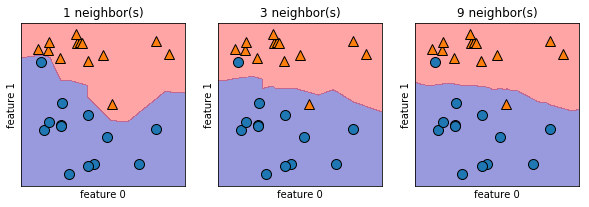

In [14]:
# The following plots shows the decision boundary for values 1, 3 and 9
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object itself, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")

axes[0].legends(loc=3)


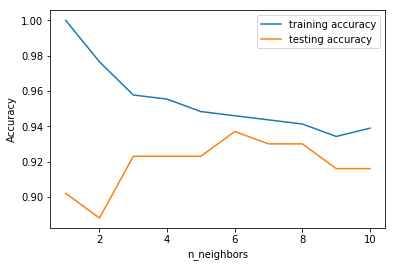

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # Record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # Record testing set accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="testing accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

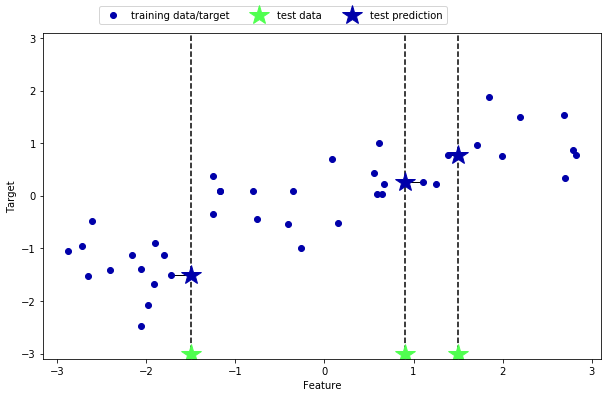

In [17]:
mglearn.plots.plot_knn_regression(n_neighbors=1)


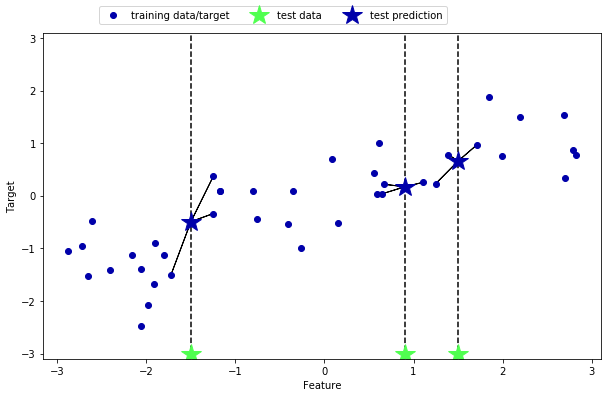

In [18]:
mglearn.plots.plot_knn_regression(n_neighbors=3)